

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset features information about over 10,000 movies and has 10866 rows and 21columns. The columns in the data set include id of the movie, imdb_id, popularity rating, budget, revenue, original title, cast in the movie, homepage, director, tagline, keywords, overview, movie genres, production_companies, movie release dates, vote_count,  vote_average,year of release release_year, budget_ad and revenue_adj.  


### Question(s) for Analysis
>What movies have the highest & lowest budget, revenue and profit? 
Who are the most popular directors?
What are the most popular and profitable production companies?
What are the most popular and profitable genres?
Profit distribution of movies.
Effect of runtime on popularity?
Effect of budget on popularity?

In [199]:
#import all of the necessary packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [200]:
#load tmdb-movies data to varaible-df
#display a portion of tmdb-movies data
df=pd.read_csv('movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [201]:
#display information about tmdb-movies dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<a id='wrangling'></a>
## Data Wrangling

> The dataset has 10866 rows and 21 columns with varying data types in each column




### Data Cleaning
> Data cleaning was done by deleting duplicate records, deleting rows with invalid entries, changing data type to appropriate data types, deleting colums that are not needed from the dataset, derive and create needed colum.
 

In [202]:
#check for duplicated rows
sum(df.duplicated())

1

In [203]:
#drop the duplicate present
df.drop_duplicates(inplace=True)

In [204]:
#entries for budget, revenue and runtime for movies cannot be 0
#hence, to clean up the data, rows with invalid entries for budget, revenue and runtime have to be dropped
bud_rev_run = ['budget', 'revenue', 'runtime']

df[bud_rev_run] = df[bud_rev_run].replace(0, np.NaN)
 
df.dropna(subset = bud_rev_run, inplace = True)


In [205]:
#edit release_date column to standard datetime format  
df.release_date = pd.to_datetime(df['release_date'])

In [206]:
#delete columns that are not needed for analysis 
del_col = ['budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'vote_count', 'vote_average']

In [207]:
#deleting the columns from the database
df = df.drop(del_col, axis = 1)

In [208]:
df.insert(5, 'profit', df['revenue'] - df['budget'])

In [209]:
#display a portion of cleaned dataset
df.head()

,id,imdb_id,popularity,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015


In [210]:
#display information about cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   imdb_id               3854 non-null   object        
 2   popularity            3854 non-null   float64       
 3   budget                3854 non-null   float64       
 4   revenue               3854 non-null   float64       
 5   profit                3854 non-null   float64       
 6   original_title        3854 non-null   object        
 7   cast                  3850 non-null   object        
 8   director              3853 non-null   object        
 9   tagline               3574 non-null   object        
 10  runtime               3854 non-null   float64       
 11  genres                3854 non-null   object        
 12  production_companies  3808 non-null   object        
 13  release_date     

<a id='eda'></a>
## Exploratory Data Analysis

> 
### Research Question 1 (Information about movies with the highest & lowest budget, revenue and profit.)

In [60]:
#function to show information about highest and lowest values of different colums

def highest_and_lowest(column):

        highest = df[column].idxmax()
        highest_info = pd.DataFrame(df.loc[highest])
    
        lowest = df[column].idxmin()
        lowest_info = pd.DataFrame(df.loc[lowest])
        
        info_table = pd.concat([highest_info, lowest_info], axis = 1)
        return info_table
       

In [61]:
highest_and_lowest('budget')

,2244,2618
id,46528,39964
imdb_id,tt1032751,tt0120836
popularity,0.25054,0.090186
budget,425000000.0,1.0
revenue,11087569.0,100.0
profit,-413912431.0,99.0
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...


<a id='eda'></a>
> The table above shows the information about the movie with the highest and lowest budget. The first column indicated by the index number "2244" shows all of the information of the movie with the highest budget and second colum indicated by the index number "2618" shows all of the information of the movie with the lowest budget.
>From the table it shows "The Warrior's way" had a budget of 425million but only made a revenue of about 11 million+ which means the movie had a loss of over 414million. 


In [62]:
 highest_and_lowest('revenue')

,1386,5067
id,19995,13537
imdb_id,tt0499549,tt0323944
popularity,9.432768,0.462609
budget,237000000.0,6000000.0
revenue,2781505847.0,2.0
profit,2544505847.0,-5999998.0
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN


<a id='eda'></a>

> The table above shows the information about the movie with the highest and lowest revenue. The first column indicated by the index number "1386" shows all of the information of the movie with the highest revenue and second colum indicated by the index number "5067" shows all of the information of the movie with the lowest revenue.
>From the table it shows "Avatar" had a whooping revenue of over 2.7billion from and initial budget of 237million. 

In [192]:
 highest_and_lowest('profit')

,1386,2244
id,19995,46528
imdb_id,tt0499549,tt1032751
popularity,9.432768,0.25054
budget,237000000.0,425000000.0
revenue,2781505847.0,11087569.0
profit,2544505847.0,-413912431.0
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.


<a id='eda'></a>
>The table above shows the information about the movie with the highest and lowest profit. The first column indicated by the index number "1386" shows all of the information of the movie with the highest profit and second colum indicated by the index number "2244" shows all of the information of the movie with the lowest profit. 
>The index numbers look familiar and of course it is no surprise that Avatar is the movie with the most profit, with over 2.5billion in profits alone, and The Warrior's way is the movie with the least profit(the most loss).

<a id='eda'></a>
## Exploratory Data Analysis

> 
### Research Question 2 (Top Directors, Production Companies and Genres)

In [211]:
#movie counts for each director
df.director.value_counts()

Steven Spielberg              27
Clint Eastwood                24
Ridley Scott                  21
Woody Allen                   18
Martin Scorsese               17
                              ..
Chris Weitz|Paul Weitz         1
Steve Beck                     1
Kelly Asbury|Lorna Cook        1
Larry Clark|Edward Lachman     1
Howard Hawks                   1
Name: director, Length: 1713, dtype: int64

In [212]:
#popular directors according to popularity rating (top 5)
popular_directors=df.groupby('director')['popularity'].sum()
pd=popular_directors.nlargest(5)

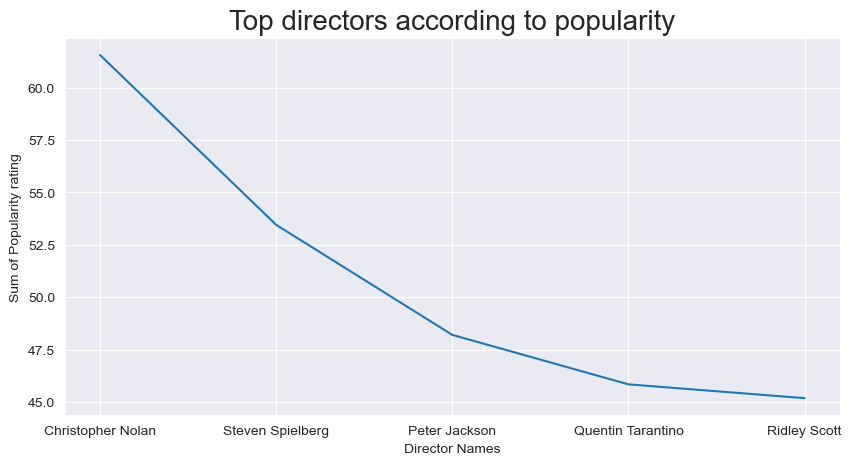

In [219]:
#line plot of popular directors according to popularity rating
sns.set_style('darkgrid')
plt.figure(figsize=(10,5), dpi = 100)
plt.xlabel('Director Names', fontsize = 10)
plt.ylabel('Sum of Popularity rating', fontsize = 10)
plt.title('Top directors according to popularity', fontsize = 20)
plt.plot(pd);

<a id='eda'></a>
>The line graph above shows top directors of movies according to their popularity rating, with Christopher Nolan in first place then Stephen Spielberg, Peter Jackson, Quentin Tarantino and Ridley Scott.

In [220]:
#Top directors according to budget available to them
top_directors=df.groupby('director')['budget'].sum()
td=top_directors.nlargest(5)

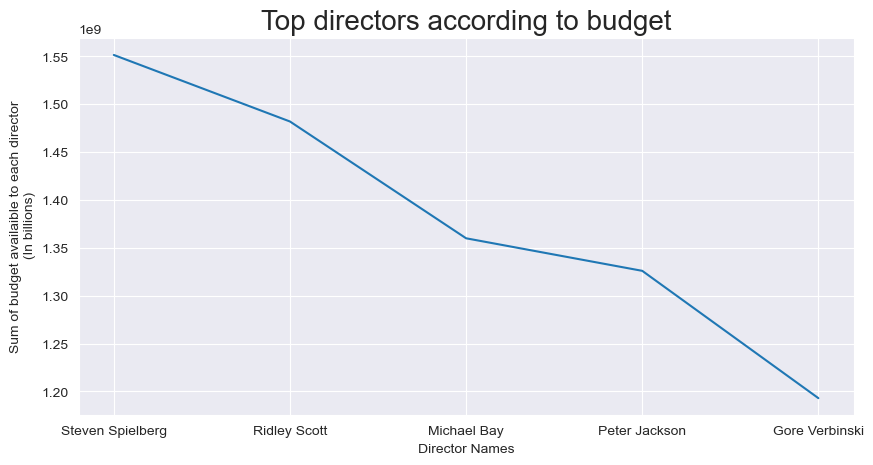

In [316]:
#Line plot of top directors according to budget available to them
sns.set_style('darkgrid')
plt.figure(figsize=(10,5), dpi = 100)
plt.xlabel('Director Names', fontsize = 10)
plt.ylabel('Sum of budget availaible to each director\n (In billions)', fontsize = 10)
plt.title('Top directors according to budget', fontsize = 20)
plt.plot(td);

<a id='eda'></a>
>The line graph above shows top directors of movies according to the budget made available to them, with Stephen Spielberg in first place then Ridley Scott, Michael Bay, Peter Jackson and Gore Verbinski.

In [222]:
#Top directors according to how much profit they make
profitable_directors=df.groupby('director')['profit'].sum()
pfd=profitable_directors.nlargest(5)

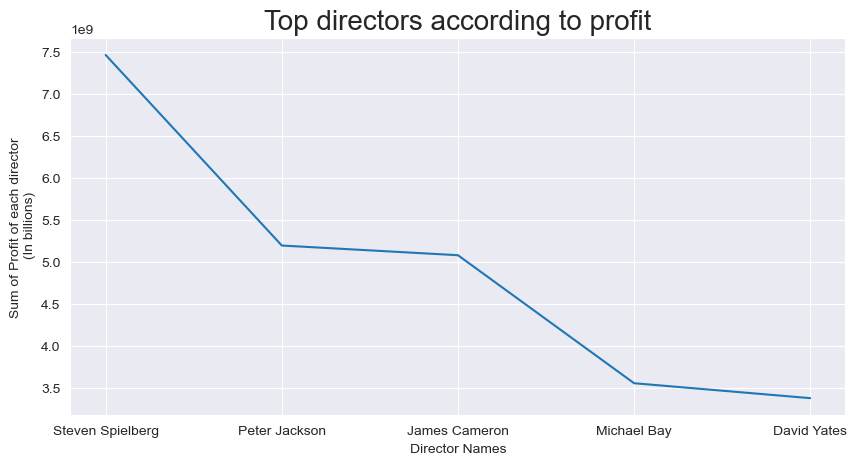

In [317]:
#Line plot of top directors according to how much profit they make
sns.set_style('darkgrid')
plt.figure(figsize=(10,5), dpi = 100)
plt.xlabel('Director Names', fontsize = 10)
plt.ylabel('Sum of Profit of each director\n (In billions)', fontsize = 10)
plt.title('Top directors according to profit', fontsize = 20)
plt.plot(pfd);

<a id='eda'></a>
>The line graph above shows top directors of movies according to how profitable they are, with Stephen Spielberg in first place again, then Peter Jackson followed closely by James Cameron, then Michael Bay and David Yates.

In [152]:
#movie counts for each production companies
df.production_companies.value_counts()

Paramount Pictures                                                                                                  77
Universal Pictures                                                                                                  57
Columbia Pictures                                                                                                   39
New Line Cinema                                                                                                     38
Warner Bros.                                                                                                        33
                                                                                                                    ..
Universal Pictures|Media Rights Capital|Gambit Pictures|Electric Shepherd Productions                                1
Virgin Produced|Mark Canton Productions                                                                              1
Paramount Vantage|Andrea Sperling Productions|In

In [297]:
#Top production companies according to popularity rating
pc_popularity=df.groupby('production_companies')['popularity'].sum()
pcp=pc_popularity.nlargest()

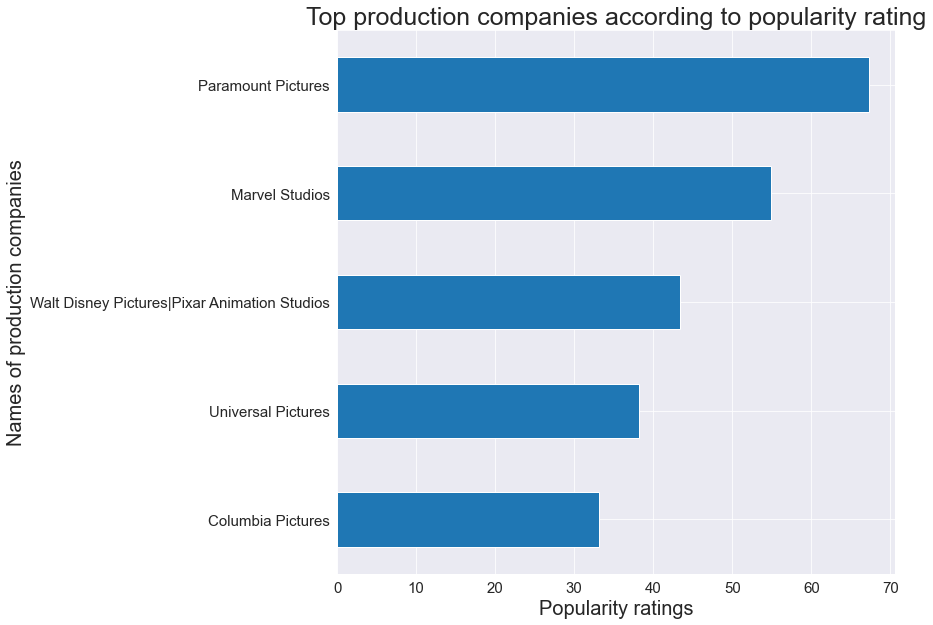

In [298]:
#horizontal bar chart of top production companies according to popularity rating
pcp.sort_values(ascending = True, inplace = True)
pcp.plot.barh( figsize=(10,10), fontsize = 15)
plt.xlabel('Popularity ratings', fontsize = 20)
plt.ylabel('Names of production companies', fontsize = 20)
plt.title("Top production companies according to popularity rating", fontsize= 25)
plt.show()

<a id='eda'></a>
>The horizontal bar plot above shows top production companies according to popularity ratings with Paramount pictures first followed by Marvel Studios, Walt Disney Pictures|Pixar Animation Studios, Universal Pictures and, Columbia Pictures.

In [301]:
#Top production companies according to budget available to them
pc_budget=df.groupby('production_companies')['budget'].sum()
pcb=pc_budget.nlargest()

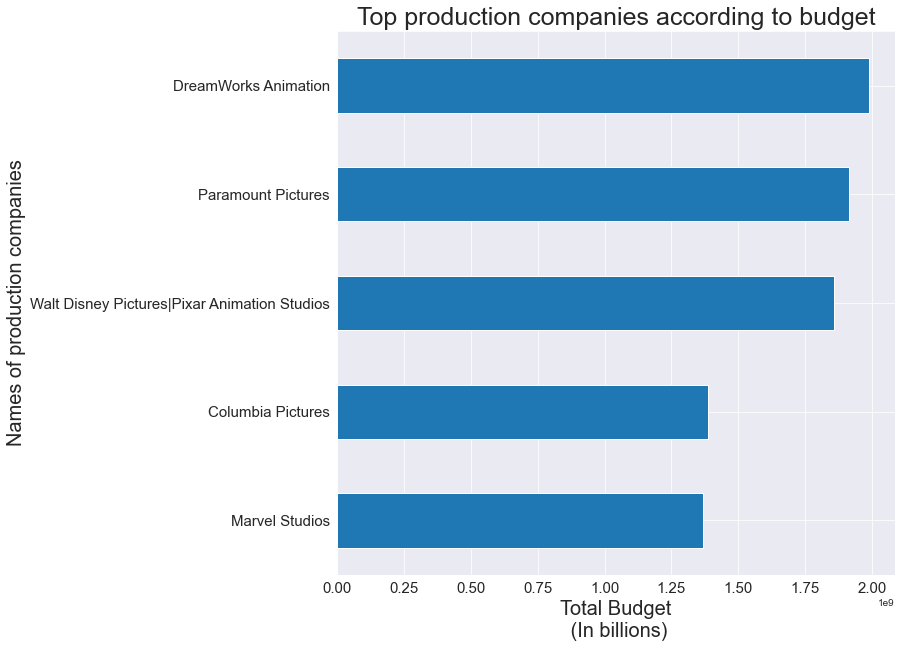

In [318]:
#horizontal bar chart of top production companies according to budget
pcb.sort_values(ascending = True, inplace = True)
pcb.plot.barh( figsize=(10,10), fontsize = 15)
plt.xlabel('Total Budget\n (In billions)', fontsize = 20)
plt.ylabel('Names of production companies', fontsize = 20)
plt.title("Top production companies according to budget", fontsize= 25)
plt.show()

<a id='eda'></a>
>The horizontal bar plot above shows top production companies according to total budget available to them with DreamWorks Animation first followed by Paramount pictures, Walt Disney Pictures|Pixar Animation Studios, Columbia Pictures and Marvel Studios.

In [304]:
#Top production companies according to how profitable the movies they make are
pc_profit=df.groupby('production_companies')['profit'].sum()
pc_pf=pc_profit.nlargest( )

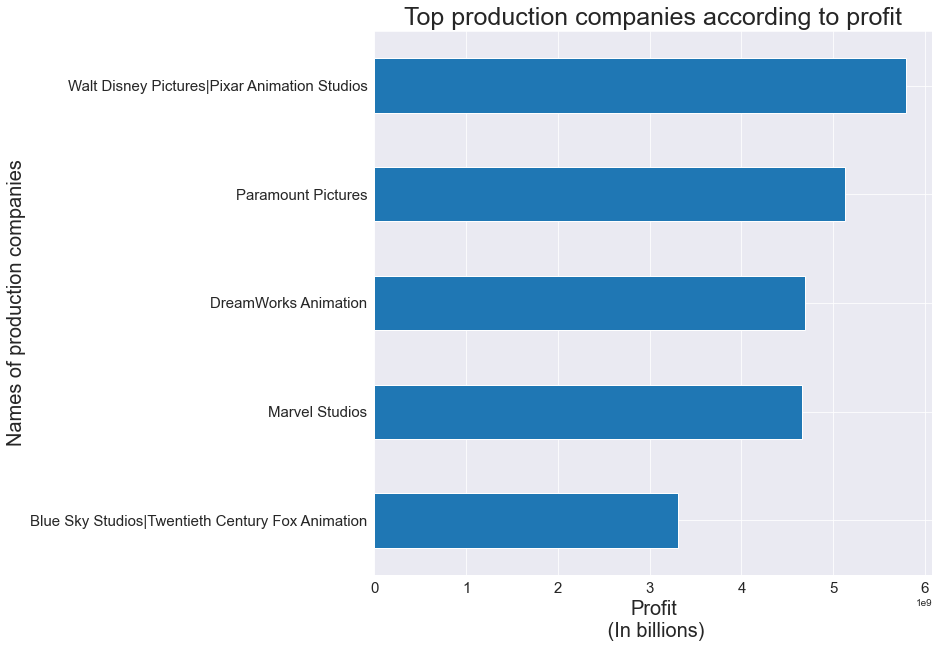

In [319]:
#horizontal bar chart of top production companies according to popularity rating
pc_pf.sort_values(ascending = True, inplace = True)
pc_pf.plot.barh( figsize=(10,10), fontsize = 15)
plt.xlabel('Profit\n (In billions)', fontsize = 20)
plt.ylabel('Names of production companies', fontsize = 20)
plt.title("Top production companies according to profit", fontsize= 25)
plt.show()

<a id='eda'></a>
>The horizontal bar plot above shows top production companies according to how profitable they are with Walt Disney Pictures|Pixar Animation Studios first,Paramount pictures, DreamWorks Animation, Marvel Studios and Blue Sky Studios| Twentieth Century Fox Animation.

In [328]:
#Top genres according to popularity ratings
gp=df.groupby('genres')['popularity'].sum()
gp2=gp.nlargest()

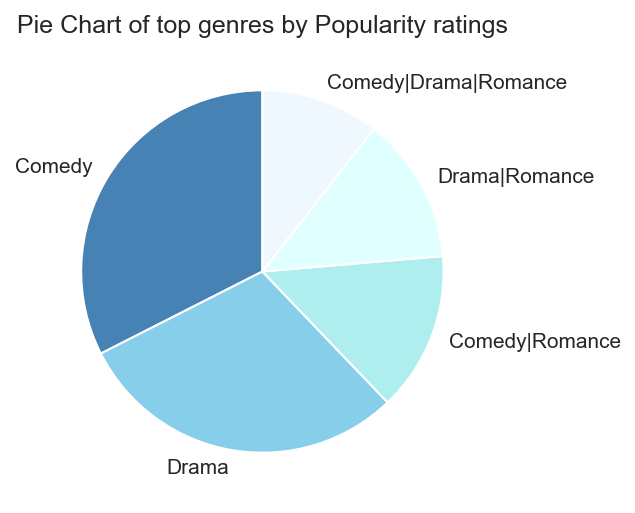

In [329]:
#Pie chart of top genres according to popularity ratings
thelabels=["Comedy","Drama","Comedy|Romance","Drama|Romance","Comedy|Drama|Romance"]
thecolors=["#4682B4","#87CEEB","#AFEEEE","#E0FFFF","#F0F8FF"]
plt.figure(dpi = 150)
plt.pie(gp2, labels=thelabels, colors=thecolors, startangle=90)
plt.title('Pie Chart of top genres by Popularity ratings')
plt.show();

<a id='eda'></a>

>The pie chart above shows top genres according to how popular they are with Comedy, Drama and Comedy + DRama in the top three position respectively.

In [330]:
#Top genres according to budget
gb=df.groupby('genres')['budget'].sum()
gb2=gb.nlargest()

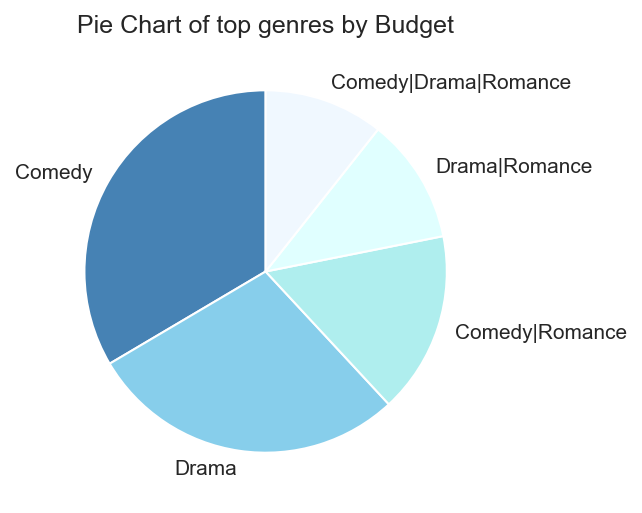

In [331]:
#Pie chart of top genres according to budget
thelabels=["Comedy","Drama","Comedy|Romance","Drama|Romance","Comedy|Drama|Romance"]
thecolors=["#4682B4","#87CEEB","#AFEEEE","#E0FFFF","#F0F8FF"]
plt.figure(dpi = 150)
plt.pie(gb2, labels=thelabels, colors=thecolors, startangle=90)
plt.title('Pie Chart of top genres by Budget')
plt.show();

<a id='eda'></a>
>The pie chart above shows top genres according to budget used for them. Comedy, Drama and Comedy + Drama are in the top three position respectively.

In [332]:
#Top genres according to how profitable they are
gf=df.groupby('genres')['profit'].sum()
gf2=gf.nlargest()

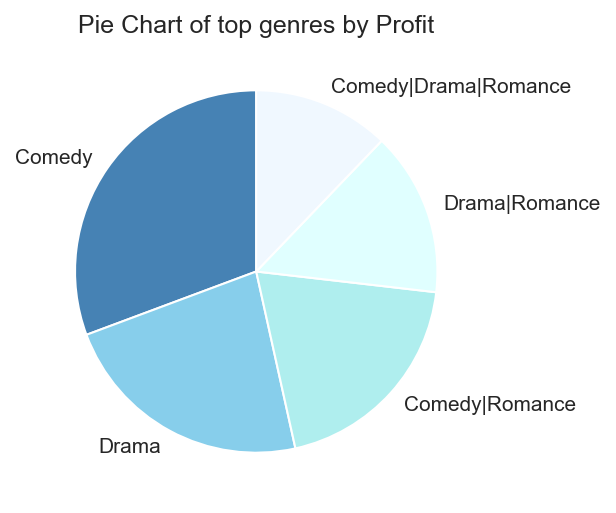

In [333]:
#Pie chart of top genres according to Profit
thelabels=["Comedy","Drama","Comedy|Romance","Drama|Romance","Comedy|Drama|Romance"]
thecolors=["#4682B4","#87CEEB","#AFEEEE","#E0FFFF","#F0F8FF"]
plt.figure(dpi = 150)
plt.pie(gf2, labels=thelabels, colors=thecolors, startangle=90)
plt.title('Pie Chart of top genres by Profit')
plt.show();

<a id='eda'></a>

>The pie chart above shows top genres according to how profitable they are with Comedy, Drama and Comedy + DRama in the top three position respectively again.

### Research Question 3  (Profit distribution of movies)

In [151]:
#statistics of profit column
df['profit'].describe()

count    3.854000e+03
mean     7.048292e+07
std      1.506195e+08
min     -4.139124e+08
25%     -1.321535e+06
50%      2.002019e+07
75%      8.170331e+07
max      2.544506e+09
Name: profit, dtype: float64

In [341]:
#boxplot of profit of movies
plt.figure(figsize=(10,5), dpi = 150)
sns.boxplot(df['profit']/(100000000))
plt.title('Boxplot of profit of all movies', fontsize=15)
plt.xlabel('Profit (in hundreds of millions)')
plt.show();plt.show();

<a id='eda'></a>
>The boxplot above shows the overall distribution of Profit(In hundreds of millions) of movies. It gives an idea of how the Profit is spread, showing the minimum, maximum, median and outlying points. The boxplot shows minimum value of about -400million (which indicates a loss) and maximum value of over 2.5billion.


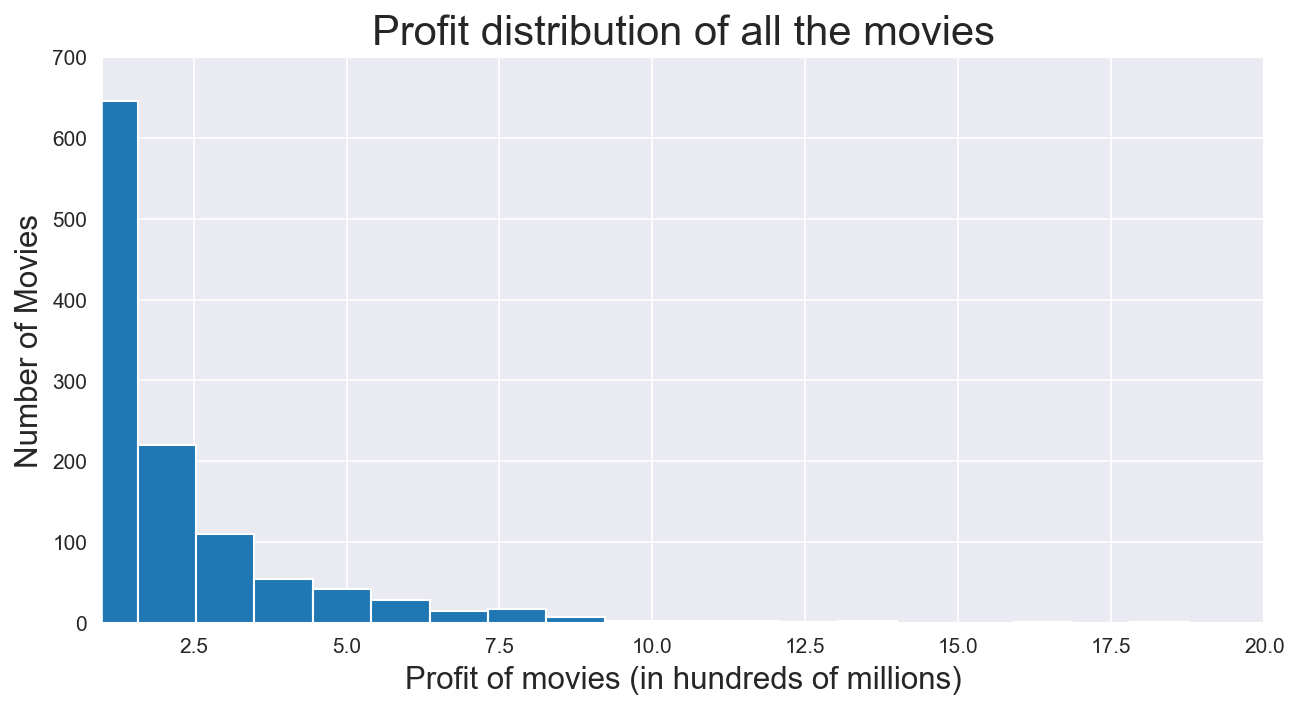

In [314]:
#histogram of profit of movies
sns.set_style('darkgrid')
plt.figure(figsize=(10,5), dpi = 150)
plt.xlim(1,20)
plt.ylim(0,700)
plt.xlabel('Profit of movies (in hundreds of millions)', fontsize = 15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Profit distribution of all the movies', fontsize=20)
plt.hist(df['profit']/(100000000), rwidth = 1, bins =31)
plt.show()

<a id='eda'></a>
>The Histogram above shows us that how many movies lie between the Profit mark of 0 and 2billion. The distribution of this histogram is positively skewed. It shows that most of the movies (about 650) make a profit less than or equal to 100million. 

### Research Question 4  (Effect of runtime and budget  on popularity)

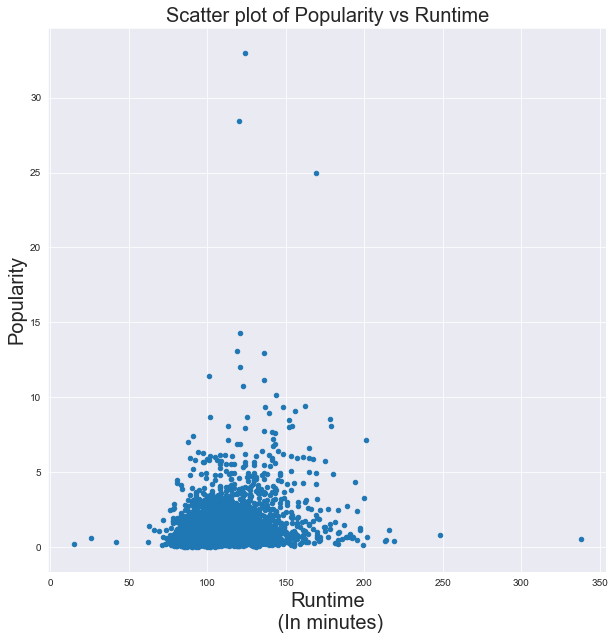

In [340]:
#scatter plot of runtime and popularity
df.plot(x='runtime',y='popularity', kind='scatter', figsize=(10,10))
plt.xlabel('Runtime\n (In minutes)', fontsize = 20)
plt.ylabel('Popularity', fontsize=20)
plt.title('Scatter plot of Popularity vs Runtime', fontsize=20);

<a id='eda'></a>
> The scatterplot above shows the runtime distribution of movies runtime against popularity. Outliers can be seen for movies with a runtime of less than 70min, more than 200mins, and for poularity ratings of over 15.
It can be seen from the plot that movies with the highest popularity have a runtime between 100 and 150. The scatterplot has a negative correlation.


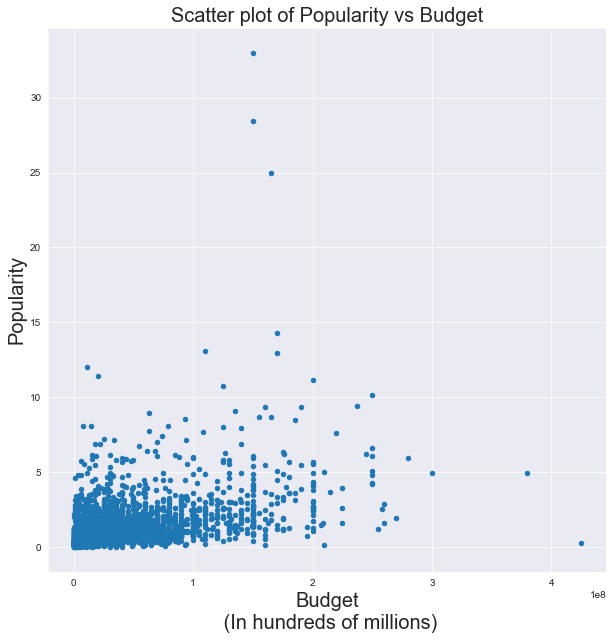

In [338]:
df.plot(x='budget',y='popularity', kind='scatter', figsize=(10,10))
plt.xlabel('Budget\n (In hundreds of millions)', fontsize = 20)
plt.ylabel('Popularity', fontsize=20)
plt.title('Scatter plot of Popularity vs Budget', fontsize=20);

<a id='eda'></a>
>The scatterplot above shows the budget distribution of movies against popularity. Outliers can be seen for movies with a budget of more than 300million and for poularity ratings of over 15. It can be seen from the plot that movies the highest popularity have a budget of almost 200,000,000million.

<a id='conclusions'></a>
## Conclusions

>
In the first section of EDA, I explored tables showing information about movies with the highest and lowest budget, revenue and profit. As seen above, the movie -The warrior's way- with the highest budget also turned out to be the one with the lowest profit and the movie- Avatar- with the highest revenue turned out to be the movie with the highest profit. 

>In section 2, the top directors, production companies and genres were visualized with a line graph, horizontal bar chart and pie chart.The most popular directors based on popularity, budget and profits are Steven Spielberg and Peter Jackson. The most popular production companies based on the same factors are Paramount Pictures, Marvel Studios and Walt Disney Pictures|Pixar Animation Studios. Finally the most popular genres based on the same factors are Comedy, Drama and Comedy|Romance. As a producer looking to make a profitable movie I would pick any of these directors, production companies and genres.

>In section 3, I explored the profit distribution of movies using a box plot and histogram. This shows outlying points and concentrated data points of profit of movies. The distribution of the histogram was positively skewed and it showed that most of the movies (about 650) make a profit less than or equal to 100million. 

>In section 4, I explored the effect of Runtime on popularity and effect of budget on popularity using scatterplots. It can be seen from the plot that movies with the highest popularity had a runtime between 100 and 150.This shows that movies with a runtime of less than 70mins and more than 200mins aren't so poular. In the second scatterplot, it can be seen from the plot that movies the highest popularity have a budget of almost 200,000,000million. In a way this shows that spending so much money on a movie wouldn't necesarily translate to it been popular.





## Limitations 

> In the data available, one of the limitation is that the data does not state the currency of the budget, revenue and profit. 

> In the second section, one of the limitation is that different directors have different specialities in terms of genres, so its hard to know which combinations would be most profitable and this analysis doesn't account for it.





